In [52]:
!pip install fbprophet

In [53]:
!pip install statsmodels

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [55]:
dataset = pd.read_csv("time_series_covid_19_confirmed.csv")
dataset_death = pd.read_csv("time_series_covid_19_deaths.csv")
dataset_recovered = pd.read_csv('time_series_covid_19_recovered.csv')

In [56]:
df = dataset.iloc[:,4:].T
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/25/21,66903,132229,127361,13664,32933,1258,3586736,222139,124,5576,171,1611,750,234,20563,1017,642138,332894,11597,223613,792196,4000,387818,1050677,12777,8025,1423,355349,203513,52865,16194209,236,417133,13416,143296,4568,29549,26329,77733,225034,...,169900,34889,13495,1064375,690123,24252,5456,13308,509,135439,5816,13384,20879,337529,5203385,33166418,44074,2244084,559291,109,2490,248,578,4065,63,4290,1591,20,4,2409,4467310,271859,98849,4,226136,5931,306334,6670,93428,38706
5/26/21,67743,132244,127646,13671,33338,1258,3622135,222269,124,5576,172,1613,752,234,20575,1017,642583,333097,11597,226416,793693,4004,388987,1052652,12784,8058,1464,358562,203658,52865,16274695,240,417526,13419,143318,4592,29763,26989,77982,225424,...,172277,34889,13720,1067107,691119,24315,6091,13308,509,137894,6245,13396,21461,338853,5212123,33190470,44281,2247605,561048,109,2491,248,581,4065,63,4290,1591,20,4,2409,4470297,276435,99064,4,227407,6086,306795,6688,93627,38819
5/27/21,68366,132264,127926,13682,33607,1258,3663215,222409,124,5579,172,1615,752,234,20581,1017,643168,333317,11622,229468,794985,4006,390203,1055543,12789,8058,1491,361580,203762,53771,16342162,241,417819,13421,143414,4650,29939,27638,77982,225937,...,174861,34889,14012,1068473,692111,24365,6761,13308,509,143280,6459,13420,21987,340250,5220549,33217995,44594,2251242,563215,109,2491,248,581,4065,63,4292,1591,20,4,2411,4473677,280372,99344,4,228828,6356,306795,6696,93947,38854
5/28/21,69130,132285,128198,13693,33944,1259,3702422,222513,124,5580,173,1616,752,234,20587,1017,643709,333559,11684,232425,796343,4009,391637,1057903,12791,8058,1503,364570,203839,53771,16391930,241,418106,13424,143486,4669,30122,28237,77982,226449,...,177711,35289,14305,1068473,693023,24410,7315,13308,509,147039,6622,13432,22620,341952,5228322,33239963,45231,2254674,565451,109,2491,248,581,4065,63,4293,1592,20,4,2411,4477705,282198,99580,4,230147,6396,307569,6723,94430,38918


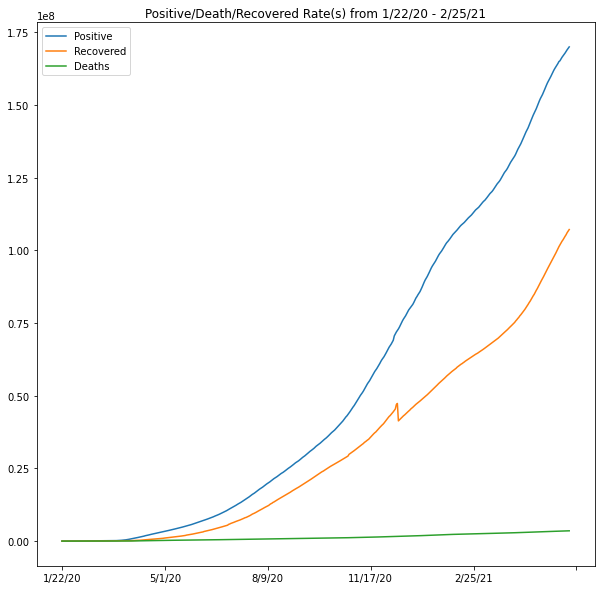

In [57]:

xdf = {'Positive':df.sum(axis = 1),
      'Recovered':dataset_recovered.iloc[:,4:].T.sum(axis = 1),
      'Deaths':dataset_death.iloc[:,4:].T.sum(axis = 1)}
pd.DataFrame(xdf).plot(title ="Positive/Death/Recovered Rate(s) from 1/22/20 - 2/25/21" ,
                      figsize= (10,10))

# FbProphet

In [58]:
data = pd.DataFrame(dataset_death.iloc[:,4:].T.sum(axis = 1))
data

,0
1/22/20,17
1/23/20,18
1/24/20,26
1/25/20,42
1/26/20,56
...,...
5/25/21,3485788
5/26/21,3498544
5/27/21,3511297
5/28/21,3523117


In [59]:
data = data.reset_index()
data.columns = ['ds','y']
data

,ds,y
0,1/22/20,17
1,1/23/20,18
2,1/24/20,26
3,1/25/20,42
4,1/26/20,56
...,...,...
489,5/25/21,3485788
490,5/26/21,3498544
491,5/27/21,3511297
492,5/28/21,3523117


In [60]:
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
future_dates = model.make_future_dataframe(periods=30)
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
519,2021-06-24
520,2021-06-25
521,2021-06-26
522,2021-06-27


In [62]:
forecasting = model.predict(future_dates)
forecasting[['ds','yhat']]

,ds,yhat
0,2020-01-22,-8.108261e+02
1,2020-01-23,2.578310e+02
2,2020-01-24,1.202833e+03
3,2020-01-25,8.962546e+02
4,2020-01-26,-1.580376e+03
...,...,...
519,2021-06-24,3.782710e+06
520,2021-06-25,3.794497e+06
521,2021-06-26,3.805033e+06
522,2021-06-27,3.813398e+06


In [63]:

prediction = model.predict(pd.DataFrame({'ds':future_dates['ds']}))
prediction


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.012232e+02,-1.687482e+04,1.563533e+04,-9.012232e+02,-9.012232e+02,90.397137,90.397137,90.397137,90.397137,90.397137,90.397137,0.0,0.0,0.0,-8.108261e+02
1,2020-01-23,-8.065721e+02,-1.572615e+04,1.653753e+04,-8.065721e+02,-8.065721e+02,1064.403136,1064.403136,1064.403136,1064.403136,1064.403136,1064.403136,0.0,0.0,0.0,2.578310e+02
2,2020-01-24,-7.119210e+02,-1.448880e+04,1.887251e+04,-7.119210e+02,-7.119210e+02,1914.753630,1914.753630,1914.753630,1914.753630,1914.753630,1914.753630,0.0,0.0,0.0,1.202833e+03
3,2020-01-25,-6.172699e+02,-1.482859e+04,1.627500e+04,-6.172699e+02,-6.172699e+02,1513.524499,1513.524499,1513.524499,1513.524499,1513.524499,1513.524499,0.0,0.0,0.0,8.962546e+02
4,2020-01-26,-5.226187e+02,-2.040423e+04,1.384726e+04,-5.226187e+02,-5.226187e+02,-1057.757494,-1057.757494,-1057.757494,-1057.757494,-1057.757494,-1057.757494,0.0,0.0,0.0,-1.580376e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2021-06-24,3.781646e+06,3.749699e+06,3.814086e+06,3.754254e+06,3.809520e+06,1064.403136,1064.403136,1064.403136,1064.403136,1064.403136,1064.403136,0.0,0.0,0.0,3.782710e+06
520,2021-06-25,3.792582e+06,3.760490e+06,3.826840e+06,3.763432e+06,3.822607e+06,1914.753630,1914.753630,1914.753630,1914.753630,1914.753630,1914.753630,0.0,0.0,0.0,3.794497e+06
521,2021-06-26,3.803519e+06,3.770833e+06,3.839626e+06,3.772396e+06,3.835188e+06,1513.524499,1513.524499,1513.524499,1513.524499,1513.524499,1513.524499,0.0,0.0,0.0,3.805033e+06
522,2021-06-27,3.814456e+06,3.779096e+06,3.849728e+06,3.781164e+06,3.847245e+06,-1057.757494,-1057.757494,-1057.757494,-1057.757494,-1057.757494,-1057.757494,0.0,0.0,0.0,3.813398e+06


In [64]:
data = data.set_index('ds')
prediction = prediction[['ds','yhat']]
prediction = prediction.set_index('ds')
prediction

,yhat
ds,
2020-01-22,-8.108261e+02
2020-01-23,2.578310e+02
2020-01-24,1.202833e+03
2020-01-25,8.962546e+02
2020-01-26,-1.580376e+03
...,...
2021-06-24,3.782710e+06
2021-06-25,3.794497e+06
2021-06-26,3.805033e+06


In [65]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
true = data['y'].iloc[-30:]
pred = prediction[pd.to_datetime(true.index[0]): 
pd.date_range(pd.to_datetime(true.index[0]),periods = 30)[-1]]
print("MAE : {}".format(mean_absolute_error(true.values,pred.values)))
print("RMSE : {}".format(mean_squared_error(true.values,pred.values,squared = False)))

MAE : 21223.065247864928
RMSE : 24127.51937752819


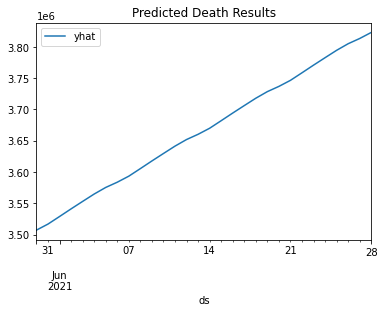

In [66]:
prediction = model.predict(pd.DataFrame({'ds':future_dates['ds'][-30:]}))[['ds','yhat']]
prediction['ds']=pd.date_range('5/30/21',periods = 30)

prediction.plot(x = 'ds',y= 'yhat',title = 'Predicted Death Results')

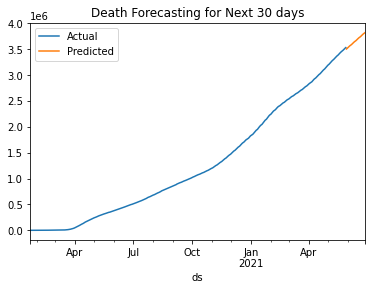

In [67]:
xdata = data.copy()
xdata = xdata.reset_index()
xdata.columns = ['ds','Actual']
prediction.columns = ['ds','Predicted']
xdata['ds'] = pd.to_datetime(xdata['ds'])
ax = xdata.plot(x= 'ds',y= 'Actual',title = 'Death Forecasting for Next 30 days')
prediction.plot(x = 'ds',y= 'Predicted',ax = ax)

# ARIMA

In [68]:

from statsmodels.tsa.arima_model import ARIMA
data = data.reset_index()


In [69]:
xdata = data.copy()
xdata.columns = ['dates','Count']
xdata['Count'] = xdata['Count'].astype({'Count':'float32'})

xdata['dates'] = pd.to_datetime(xdata['dates'])
xdata = xdata.set_index('dates')
#xdata['Count'] = xdata['Count'].astpye('float32')
model = ARIMA(xdata['Count'], order = (1,1,0), freq = 'D')
fit_model = model.fit()

In [70]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Count   No. Observations:                  493
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4377.153
Method:                       css-mle   S.D. of innovations           1733.357
Date:                Sat, 05 Jun 2021   AIC                           8760.306
Time:                        17:05:18   BIC                           8772.908
Sample:                    01-23-2020   HQIC                          8765.254
                         - 05-29-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7081.7524    909.942      7.783      0.000    5298.299    8865.206
ar.L1.D.Count     0.9160      0.018     50.757      0.000       0.881       0.951
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0917           +0.0000j            1.0917            0.0000
-----------------------------------------------------------------------------
"""

In [71]:
results = fit_model.predict(start='2021-05-30',end = '2021-07-01',dynamic = True)
results

2021-05-30    10214.781428
2021-05-31     9951.682311
2021-06-01     9710.677195
2021-06-02     9489.910714
2021-06-03     9287.683310
2021-06-04     9102.438146
2021-06-05     8932.749123
2021-06-06     8777.309898
2021-06-07     8634.923830
2021-06-08     8504.494770
2021-06-09     8385.018614
2021-06-10     8275.575584
2021-06-11     8175.323137
2021-06-12     8083.489485
2021-06-13     7999.367652
2021-06-14     7922.310030
2021-06-15     7851.723397
2021-06-16     7787.064343
2021-06-17     7727.835096
2021-06-18     7673.579681
2021-06-19     7623.880417
2021-06-20     7578.354696
2021-06-21     7536.652041
2021-06-22     7498.451407
2021-06-23     7463.458707
2021-06-24     7431.404553
2021-06-25     7402.042178
2021-06-26     7375.145536
2021-06-27     7350.507565
2021-06-28     7327.938591
2021-06-29     7307.264869
2021-06-30     7288.327242
2021-07-01     7270.979921
Freq: D, dtype: float64

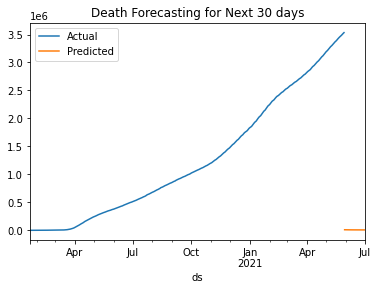

In [72]:
xdata = data.copy()
#xdata = xdata.reset_index()
xdata.columns = ['ds','Actual']
results = pd.DataFrame(results)
results = results.reset_index()
results.columns = ['ds','Predicted']
xdata['ds'] = pd.to_datetime(xdata['ds'])
ax = xdata.plot(x= 'ds',y= 'Actual',title = 'Death Forecasting for Next 30 days')
results.plot(x = 'ds',y= 'Predicted',ax = ax)

In [73]:
results = fit_model.predict(start='2021-05-01',end = '2021-07-01',dynamic = True)
results = pd.DataFrame(results)
results = results.reset_index()
results.columns = ['ds','Predicted']
pred = results['Predicted'].values
true = xdata['Actual'].iloc[-results.shape[0]:].values
print("MAE : {}".format(mean_absolute_error(true,pred)))
print("RMSE : {}".format(mean_squared_error(true,pred,squared = False)))

MAE : 3150610.592222489
RMSE : 3158579.4267255715


In [74]:
#xdata = xdata.set_index('ds')
data = data.set_index('ds')

In [75]:
results = fit_model.predict(start='2021-05-01',end = '2021-05-29',dynamic = True)

true = data['y'].iloc[-results.shape[0]:]
print(f'start date : {true.index[0]}')
print(f'end date : {true.index[-1]}')
results = pd.DataFrame(results)
results = results.reset_index()
results.columns = ['ds','Predicted']
results = results.set_index('ds')
pred = results['2020-11-29':'2021-05-29']

print("MAE : {}".format(mean_absolute_error(true,pred)))
print("RMSE : {}".format(mean_squared_error(true,pred,squared = False)))


start date : 5/1/21
end date : 5/29/21
MAE : 3356557.050731694
RMSE : 3358175.5630732076


# Neural Networks (CNN and LSTM)

## Convolutional Network

In [76]:
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [77]:
conv_data = {'day':[],"month":[],"year":[],'Y(Death)':[]}
for index, value in zip(data.index,data.y.values):
  x = index.split('/')
  conv_data['month'].append(x[0])
  conv_data['day'].append(x[1])
  conv_data['year'].append(x[-1])
  conv_data['Y(Death)'].append(value)
conv_data =pd.DataFrame(conv_data)

In [78]:
conv_data

,day,month,year,Y(Death)
0,22,1,20,17
1,23,1,20,18
2,24,1,20,26
3,25,1,20,42
4,26,1,20,56
...,...,...,...,...
489,25,5,21,3485788
490,26,5,21,3498544
491,27,5,21,3511297
492,28,5,21,3523117


In [79]:
conv_data = conv_data.astype(np.float32)

### Without Scaling

In [80]:
xtrain,xtest,ytrain,ytest = train_test_split(conv_data.iloc[:,:-1],
                                             conv_data.iloc[:,-1],
                                             test_size = .10,
                                             random_state = 90)

In [81]:
xtrain

,day,month,year
399,24.0,2.0,21.0
79,10.0,4.0,20.0
224,2.0,9.0,20.0
144,14.0,6.0,20.0
320,7.0,12.0,20.0
...,...,...,...
323,10.0,12.0,20.0
159,29.0,6.0,20.0
114,15.0,5.0,20.0
157,27.0,6.0,20.0


In [82]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((444, 3), (50, 3), (444,), (50,))

In [83]:
 def Conv1d(performance_metrics = 'mae'):
  model = Sequential()
  model.add(Conv1D(32,kernel_size = 1 ,activation='relu', input_shape = (1,3)))
  model.add(Conv1D(32, kernel_size = 1, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer = Adam() , loss = 'mean_squared_error',metrics = [performance_metrics])
  return model

In [84]:
model = Conv1d()

In [85]:
x = np.resize(xtrain,(444,1,3))
model.fit(x,ytrain,verbose = 1,batch_size=100,epochs = 500)

Epoch 1/500
5/5 [==============================] - 1s 4ms/step - loss: 2609324184917.3335 - mae: 1222616.0833
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 2665357945514.6665 - mae: 1242041.8750
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 2856608595968.0000 - mae: 1302264.5000
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 2581499478016.0000 - mae: 1213674.6875
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 2867548738901.3335 - mae: 1291999.0417
Epoch 6/500
5/5 [==============================] - 0s 4ms/step - loss: 2752667757226.6665 - mae: 1251392.8958
Epoch 7/500
5/5 [==============================] - 0s 4ms/step - loss: 2688558650709.3335 - mae: 1242052.3750
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 2708855324672.0000 - mae: 1250412.5000
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 2828707517781.3335 - mae: 1275224.7083
Epoch 10/5

#### evaluation and prediction

In [86]:
model.evaluate(np.resize(xtest,(xtest.shape[0],1,3)),ytest)

2/2 [==============================] - 0s 6ms/step - loss: 939547099136.0000 - mae: 783929.9375


[939547099136.0, 783929.9375]

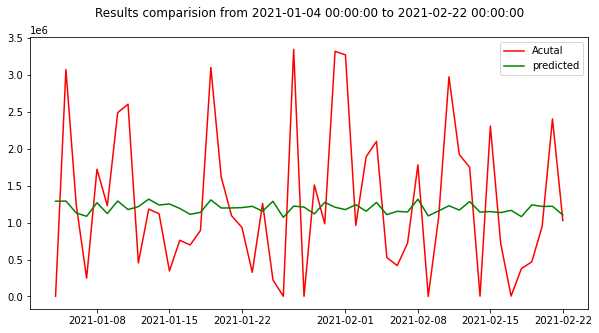

In [87]:
predict = model.predict(np.resize(xtest,(xtest.shape[0],1,3)))
dates = pd.date_range(start ='1/04/21',periods = xtest.shape[0] )
plt.figure(figsize = (10,5))
plt.title(f"Results comparision from {dates[0]} to {dates[-1]}",pad = 20)
plt.plot(dates,ytest,color = 'red',label = 'Acutal')
plt.plot(dates,predict,color = 'green',label = 'predicted')
plt.legend()

### Scaling the data

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
xtrain,xtest,ytrain,ytest = train_test_split(StandardScaler().fit(conv_data.iloc[:,:-1]).fit_transform(conv_data.iloc[:,:-1]),
                                             conv_data.iloc[:,-1],
                                             test_size = .10,
                                             random_state = 90)

In [90]:
model = Conv1d(performance_metrics = 'mae')
x = np.resize(xtrain,(444,1,3))
model.fit(x,ytrain,verbose = 1,batch_size=100,epochs = 500)

Epoch 1/500
5/5 [==============================] - 1s 4ms/step - loss: 2889740845056.0000 - mae: 1295509.9167
Epoch 2/500
5/5 [==============================] - 0s 4ms/step - loss: 2813981622272.0000 - mae: 1286620.8958
Epoch 3/500
5/5 [==============================] - 0s 4ms/step - loss: 2716270766762.6665 - mae: 1252120.8958
Epoch 4/500
5/5 [==============================] - 0s 4ms/step - loss: 2834179555328.0000 - mae: 1288414.9375
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 2763295293440.0000 - mae: 1258602.7500
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 2832054528682.6665 - mae: 1276625.1250
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 2854272281258.6665 - mae: 1285746.4792
Epoch 8/500
5/5 [==============================] - 0s 4ms/step - loss: 2831898684074.6665 - mae: 1293039.4792
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 2632080687104.0000 - mae: 1218415.1458
Epoch 10/5

#### evaluation and prediction

In [91]:
model.evaluate(np.resize(xtest,(xtest.shape[0],1,3)),ytest)

2/2 [==============================] - 0s 7ms/step - loss: 66681643008.0000 - mae: 155406.0938


[66681643008.0, 155406.09375]

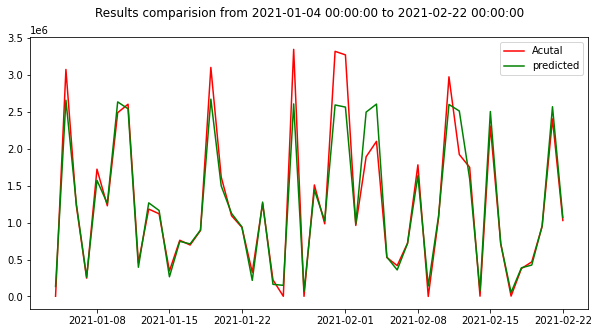

In [92]:
predict = model.predict(np.resize(xtest,(xtest.shape[0],1,3)))
dates = pd.date_range(start ='1/04/21',periods = xtest.shape[0] )
plt.figure(figsize = (10,5))
plt.title(f"Results comparision from {dates[0]} to {dates[-1]}",pad = 20)
plt.plot(dates,ytest,color = 'red',label = 'Acutal')
plt.plot(dates,predict,color = 'green',label = 'predicted')
plt.legend()

## LSTM

In [93]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

In [94]:
 def LSTM_NETWORK(performance_metrics = 'mae'):
  model = Sequential()

  model.add(LSTM(32, input_shape = (1,3),return_sequences = True))
  model.add(LSTM(32))

  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer = Adam() , loss = 'mean_squared_error',metrics = [performance_metrics])
  return model

### Without Scaling

In [95]:
xtrain,xtest,ytrain,ytest = train_test_split(conv_data.iloc[:,:-1],
                                             conv_data.iloc[:,-1],
                                             test_size = .10,
                                             random_state = 90)

In [96]:
model = LSTM_NETWORK(performance_metrics = 'mae')
x = np.resize(xtrain,(444,1,3))
model.fit(x,ytrain,verbose = 1,batch_size=100,epochs = 500)

Epoch 1/500
5/5 [==============================] - 4s 7ms/step - loss: 2811456913408.0000 - mae: 1269335.0208
Epoch 2/500
5/5 [==============================] - 0s 5ms/step - loss: 2790233997312.0000 - mae: 1274565.6458
Epoch 3/500
5/5 [==============================] - 0s 5ms/step - loss: 2620159863466.6665 - mae: 1221244.2917
Epoch 4/500
5/5 [==============================] - 0s 6ms/step - loss: 2881903307434.6665 - mae: 1308867.4375
Epoch 5/500
5/5 [==============================] - 0s 5ms/step - loss: 2789798881962.6665 - mae: 1269144.8542
Epoch 6/500
5/5 [==============================] - 0s 4ms/step - loss: 2753634981205.3335 - mae: 1282498.4375
Epoch 7/500
5/5 [==============================] - 0s 5ms/step - loss: 2713135917738.6665 - mae: 1240989.9583
Epoch 8/500
5/5 [==============================] - 0s 6ms/step - loss: 2793299378176.0000 - mae: 1290601.2083
Epoch 9/500
5/5 [==============================] - 0s 5ms/step - loss: 2828933223765.3335 - mae: 1283486.7292
Epoch 10/5

#### Evalution and prediction

In [97]:
model.evaluate(np.resize(xtest,(xtest.shape[0],1,3)),ytest)

2/2 [==============================] - 1s 9ms/step - loss: 2523452145664.0000 - mae: 1249246.3750


[2523452145664.0, 1249246.375]

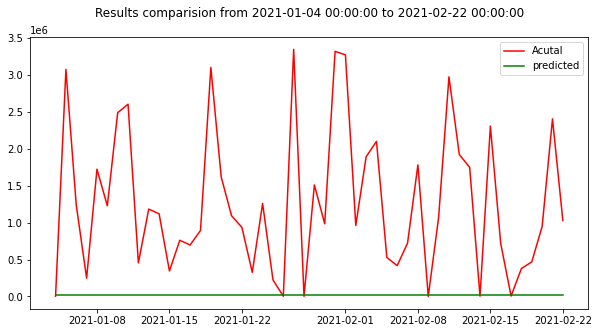

In [98]:
predict = model.predict(np.resize(xtest,(xtest.shape[0],1,3)))
dates = pd.date_range(start ='1/04/21',periods = xtest.shape[0] )
plt.figure(figsize = (10,5))
plt.title(f"Results comparision from {dates[0]} to {dates[-1]}",pad = 20)
plt.plot(dates,ytest,color = 'red',label = 'Acutal')
plt.plot(dates,predict,color = 'green',label = 'predicted')
plt.legend()

### With Scaling

In [99]:
xtrain,xtest,ytrain,ytest = train_test_split(StandardScaler().fit(conv_data.iloc[:,:-1]).fit_transform(conv_data.iloc[:,:-1]),
                                             conv_data.iloc[:,-1],
                                             test_size = .10,
                                             random_state = 90)

In [100]:
model = LSTM_NETWORK(performance_metrics = 'mae')
x = np.resize(xtrain,(444,1,3))
model.fit(x,ytrain,verbose = 1,batch_size=100,epochs = 500)

Epoch 1/500
5/5 [==============================] - 4s 5ms/step - loss: 2802534012245.3335 - mae: 1281217.2500
Epoch 2/500
5/5 [==============================] - 0s 4ms/step - loss: 2742925393920.0000 - mae: 1258679.2500
Epoch 3/500
5/5 [==============================] - 0s 5ms/step - loss: 2642325886293.3335 - mae: 1229887.0833
Epoch 4/500
5/5 [==============================] - 0s 5ms/step - loss: 2886356391253.3335 - mae: 1302555.6667
Epoch 5/500
5/5 [==============================] - 0s 5ms/step - loss: 2625274511360.0000 - mae: 1219377.6042
Epoch 6/500
5/5 [==============================] - 0s 4ms/step - loss: 2737410670592.0000 - mae: 1254255.7292
Epoch 7/500
5/5 [==============================] - 0s 4ms/step - loss: 2696113946624.0000 - mae: 1254933.7917
Epoch 8/500
5/5 [==============================] - 0s 5ms/step - loss: 2701480427520.0000 - mae: 1252114.7917
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 2661109377706.6665 - mae: 1236001.0417
Epoch 10/5

#### Evalution and prediction

In [101]:
model.evaluate(np.resize(xtest,(xtest.shape[0],1,3)),ytest)

2/2 [==============================] - 1s 8ms/step - loss: 2518223159296.0000 - mae: 1247647.5000


[2518223159296.0, 1247647.5]

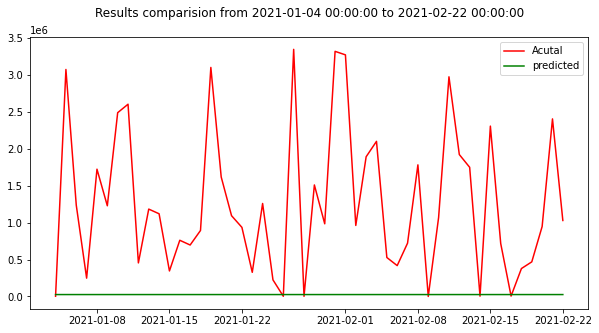

In [102]:
predict = model.predict(np.resize(xtest,(xtest.shape[0],1,3)))
dates = pd.date_range(start ='1/04/21',periods = xtest.shape[0] )
plt.figure(figsize = (10,5))
plt.title(f"Results comparision from {dates[0]} to {dates[-1]}",pad = 20)
plt.plot(dates,ytest,color = 'red',label = 'Acutal')
plt.plot(dates,predict,color = 'green',label = 'predicted')
plt.legend()

In [103]:

pd.date_range(start = '5/29/21',periods=39)

DatetimeIndex(['2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01',
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05',
               '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13',
               '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-18', '2021-06-19', '2021-06-20', '2021-06-21',
               '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
               '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03',
               '2021-07-04', '2021-07-05', '2021-07-06'],
              dtype='datetime64[ns]', freq='D')